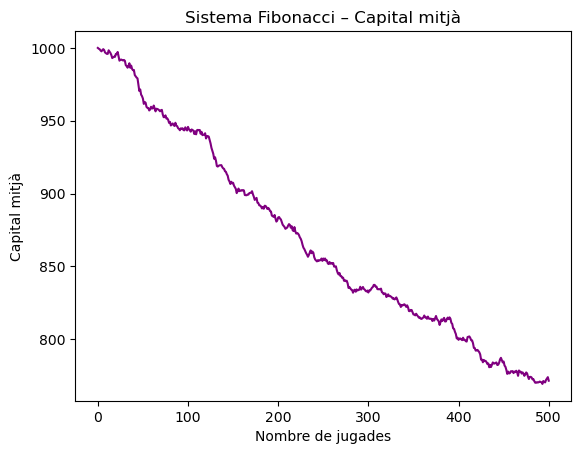

Percentatge de ruïna: 57.0 %
Capital mitjà final: 771.48


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Paràmetres globals
B0 = 1000       # capital inicial
n = 500         # nombre màxim de jugades
N = 1000        # nombre de simulacions
b0 = 10         # aposta inicial

p_guanyar = 18 / 37
p_perdre = 19 / 37

# Emmagatzematge
trajectories = np.zeros((N, n + 1))
capitals_finals = []
ruina = []

# Simulació Monte Carlo – Sistema Fibonacci
for sim in range(N):
    B = B0
    trajectories[sim, 0] = B
    
    # Llista per guardar la seqüència actual de bets
    fib_sequence = [b0, b0]  # b1, b2
    k = 0  # índex de la seqüència, indica quina aposta toca
    
    for i in range(1, n + 1):
        if B <= 0:
            trajectories[sim, i] = 0
            continue
        
        # Aposta actual
        bi = fib_sequence[k]
        
        # Limitar aposta al capital disponible
        if bi > B:
            bi = B

        # Resultat aleatori
        Xi = np.random.choice([1, -1], p=[p_guanyar, p_perdre])
        B = B + bi * Xi
        trajectories[sim, i] = B

        # Actualització de la seqüència de Fibonacci
        if Xi == -1:  # pèrdua → pas al següent terme
            k += 1
            # Generar el següent terme si cal
            if k >= len(fib_sequence):
                fib_sequence.append(fib_sequence[-1] + fib_sequence[-2])
        else:  # guany → retrocedir dos termes
            k = max(k - 2, 0)

    capitals_finals.append(B)
    ruina.append(1 if B <= 0 else 0)

# Mitjana
capital_mitja = np.mean(trajectories, axis=0)

# Gràfic
plt.figure()
plt.plot(capital_mitja, color='purple')
plt.xlabel("Nombre de jugades")
plt.ylabel("Capital mitjà")
plt.title("Sistema Fibonacci – Capital mitjà")
plt.show()

# Resultats numèrics
print("Percentatge de ruïna:", 100 * sum(ruina) / N, "%")
print("Capital mitjà final:", np.mean(capitals_finals))
